#### 분류평가

In [60]:
# titanic_train.csv 읽기
import pandas as pd
df_titanic = pd.read_csv('../ML/datasets/train.csv')

In [61]:
# loc를 활용하여 feature (Survived , Sex , Age ,Pclass) 와 label 만으로 이뤄진 데이타프레임
df_titanic =df_titanic.loc[: , ['Survived' , 'Sex' , 'Age' ,'Pclass']]

In [62]:
# feature를 X로 label를 y로 저장
X = df_titanic.drop('Survived' , axis=1)
y = df_titanic['Survived']

In [63]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

labels = encoder.fit_transform(X['Sex'])

X['Sex'] = labels

In [64]:
import numpy as np
# MinMaxScaler를 이용해서 Age를 스케일링
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터셋 변환, fit()과 transfom() 호출
age = np.array(X['Age']).reshape(-1,1)
scaler.fit(age)
age = scaler.transform(age)
X['Age'] = age

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, \
        재현율: {2:.4f}, f1score: {3:.4f}'.format(accuracy, precision, recall, f1score))

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df_titanic = pd.read_csv('../ML/datasets/train.csv')
df_titanic = df_titanic.loc[:,['Survived', 'Sex', 'Age', 'Pclass']]
X = df_titanic.loc[:,['Sex', 'Age', 'Pclass']]
y = df_titanic['Survived']
X['Age'].fillna(method='ffill', inplace=True)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(X['Sex'])
X['Sex'] = labels
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[['Age']])
age_scaled = scaler.transform(X[['Age']])
X['Age']=age_scaled

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424,         재현율: 0.8033, f1score: 0.7717


In [68]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
# 예측확률 array 와 예측 겨과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 학인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.42558527 0.57441473 1.        ]
 [0.88833758 0.11166242 0.        ]
 [0.88651722 0.11348278 0.        ]]


In [69]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [70]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임.
custom_threshold = 0.5

# pred_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424,         재현율: 0.8033, f1score: 0.7717


In [71]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임.
custom_threshold = 0.4

# pred_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[94 24]
 [10 51]]
정확도: 0.8101, 정밀도: 0.6800,         재현율: 0.8361, f1score: 0.7500


In [72]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #threshold list 객체 내 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)  
        get_clf_eval(y_test, custom_predict)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차행렬
[[94 24]
 [10 51]]
정확도: 0.8101, 정밀도: 0.6800,         재현율: 0.8361, f1score: 0.7500
임계값: 0.45
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042,         재현율: 0.8197, f1score: 0.7576
임계값: 0.5
오차행렬
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424,         재현율: 0.8033, f1score: 0.7717
임계값: 0.55
오차행렬
[[107  11]
 [ 17  44]]
정확도: 0.8436, 정밀도: 0.8000,         재현율: 0.7213, f1score: 0.7586
임계값: 0.6
오차행렬
[[111   7]
 [ 21  40]]
정확도: 0.8436, 정밀도: 0.8511,         재현율: 0.6557, f1score: 0.7407


In [73]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape: ', thresholds.shape)
print('반환된 precisions 배열의 Shape: ',precisions.shape)
print('반환된 recalls배열의 Shape: ', recalls.shape)

print("\nthresholds 5 samples:", thresholds[:5])
print("precisions 5 samples:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

반환된 분류 결정 임곗값 배열의 Shape:  (124,)
반환된 precisions 배열의 Shape:  (125,)
반환된 recalls배열의 Shape:  (125,)

thresholds 5 samples: [0.06556004 0.07136752 0.0776467  0.07896181 0.08303016]
precisions 5 samples: [0.34078212 0.34269663 0.34659091 0.35057471 0.35465116]
recalls 5 sample: [1. 1. 1. 1. 1.]


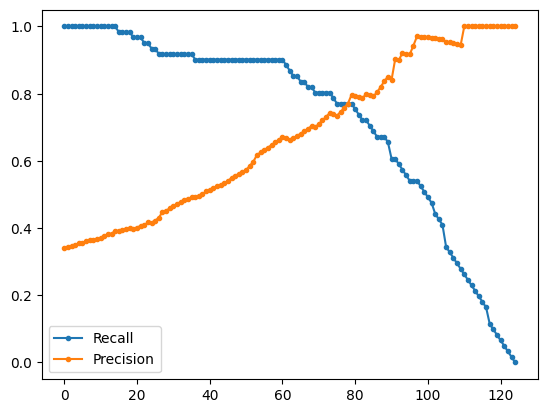

In [74]:
import matplotlib.pyplot as plt

plt.plot(recalls, marker='.', label='Recall')
plt.plot(precisions, marker='.', label='Precision')

plt.legend()
plt.show()

In [75]:
from sklearn.metrics import roc_curve
# 레이블 값이 1일 때 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되 임계값을 5step으로 추출
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 10개: ', thr_index)
print('샘플용 10개의 임계값: ', np.round(thresholds[thr_index], 2))
# 5 step으로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR: ', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임계값 배열의 index 10개:  [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66]
샘플용 10개의 임계값:  [0.95 0.81 0.65 0.6  0.55 0.47 0.4  0.27 0.18 0.13 0.12 0.11 0.1  0.08]
샘플 임계값별 FPR:  [0.    0.008 0.025 0.059 0.102 0.178 0.212 0.314 0.466 0.542 0.678 0.754
 0.839 0.941]
샘플 임계값별 TPR:  [0.016 0.344 0.541 0.656 0.721 0.803 0.852 0.902 0.902 0.918 0.934 0.967
 1.    1.   ]


In [77]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    # FPR X축의 scale을 0.1 단위로 변경, X, Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

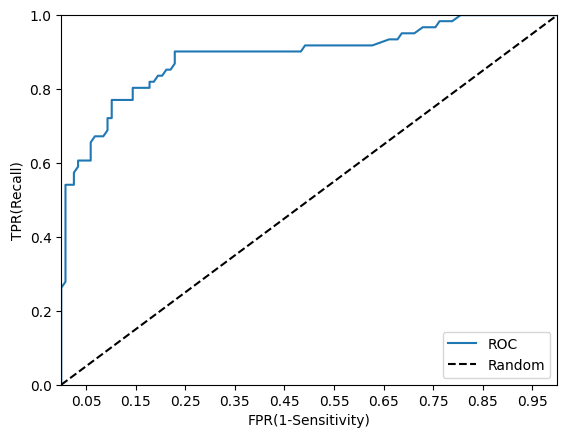

In [78]:
roc_curve_plot(y_test, pred_proba_class1)


## 피마 당뇨병

    # Data 선정
    # Data EDA
    # Data preprocessing -> feature selection
    # Data modeling -> Algorithm : Logistic Regression
    # Data evaluation


In [80]:
diabetes = pd.read_csv('../ML/datasets/diabetes (3).csv')
print(diabetes['Outcome'].value_counts())
diabetes

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [81]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


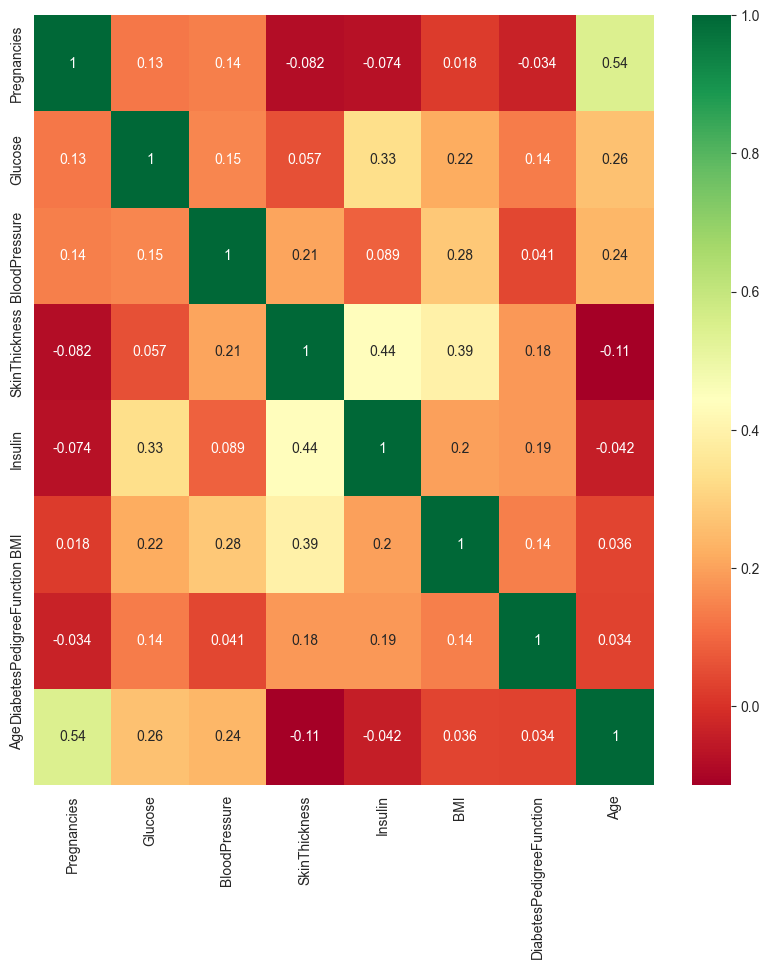

In [88]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
p = sns.heatmap(diabetes.corr(),annot=True,cmap='RdYlGn')

In [83]:
diabetes['Outcome'] = diabetes['Outcome'].astype('category')

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

# 저번에 작성한 것에 ROC AUC를 추가함
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임곗값: {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

In [85]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [86]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임, 칼럼 위치 -1을 이용해 추출
X = diabetes.loc[:, ['Age', 'BMI', 'Glucose']]
y = diabetes['Outcome']

# stratify: default=None 이고, stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 준다. (즉, 한 쪽에 쏠려서 분배되는 것을 방지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측, 평가 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC:0.7313


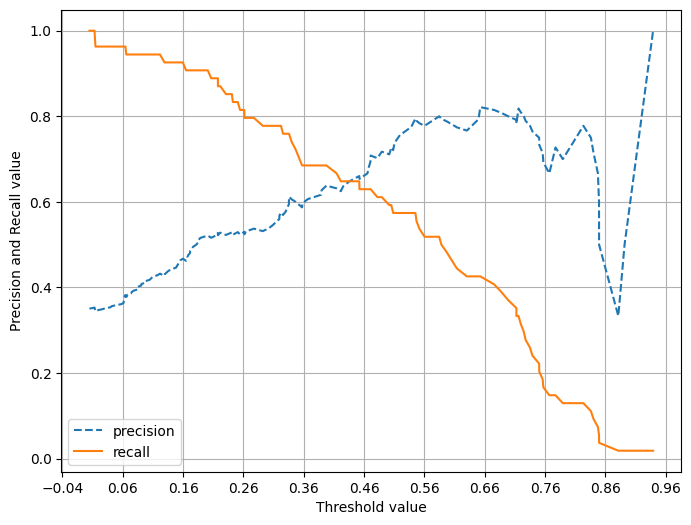

In [87]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [89]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추측
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# threshold[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작 
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index],2))

# 5 step으로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.77 0.58 0.5  0.45 0.33 0.26 0.23 0.2  0.07]
샘플 임계값별 FPR:  [0.   0.04 0.07 0.13 0.18 0.31 0.39 0.42 0.45 0.84]
샘플 임계값별 TPR:  [0.019 0.148 0.519 0.593 0.648 0.759 0.815 0.852 0.907 0.944]


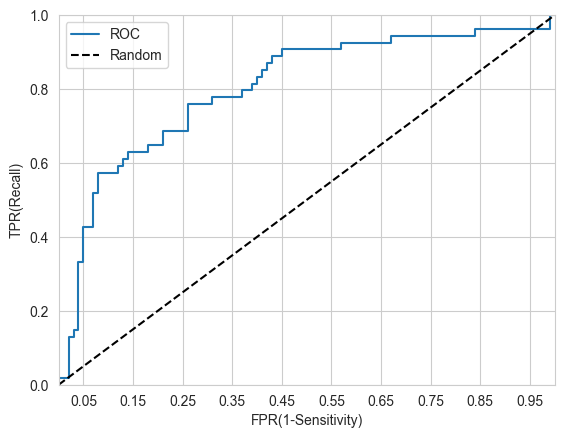

In [90]:
plt.plot(fprs, tprs, label = 'ROC')
# 가운데 대각선 직선을 그림
plt.plot([0,1], [0,1], 'k--', label='Random')
    
# FPR X축의 scale을 0.1 단위로 변경, X, Y 축명 설정등
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0: .4f}'.format(roc_score))

ROC AUC 값:  0.8026
